In [1]:
import fsspec
import rioxarray
import s3fs
import xarray as xr
import xrefcoord  # noqa

In [2]:
fs = fsspec.filesystem(
    "reference",
    fo="references/RADAR.json",
    remote_protocol="s3",
    remote_options={"anon": True},
    skip_instance_cache=True,
)
m = fs.get_mapper("")
ds = xr.open_dataset(m, engine="zarr", consolidated=False)

In [3]:
dt = ds.xref.generate_multiscale_coords()

numcodec 'imagecodecs_aec' already registered
numcodec 'imagecodecs_apng' already registered
numcodec 'imagecodecs_avif' already registered
numcodec 'imagecodecs_bitorder' already registered
numcodec 'imagecodecs_bitshuffle' already registered
numcodec 'imagecodecs_blosc' already registered
numcodec 'imagecodecs_blosc2' already registered
numcodec 'imagecodecs_brotli' already registered
numcodec 'imagecodecs_byteshuffle' already registered
numcodec 'imagecodecs_bz2' already registered
numcodec 'imagecodecs_cms' already registered
numcodec 'imagecodecs_deflate' already registered
numcodec 'imagecodecs_delta' already registered
numcodec 'imagecodecs_float24' already registered
numcodec 'imagecodecs_floatpred' already registered
numcodec 'imagecodecs_gif' already registered
numcodec 'imagecodecs_heif' already registered
numcodec 'imagecodecs_jetraw' already registered
numcodec 'imagecodecs_jpeg' already registered
numcodec 'imagecodecs_jpeg2k' already registered
numcodec 'imagecodecs_jpeg

In [6]:
dt["0"]

DataTree('0', parent="None")
    Dimensions:  (time: 23, y: 1345, x: 850)
    Coordinates:
      * time     (time) datetime64[s] 2023-01-01T01:00:00 ... 2023-01-01T23:00:00
      * x        (x) float64 -1.177e+05 -1.166e+05 -1.154e+05 ... 8.738e+05 8.75e+05
      * y        (y) float64 7.907e+06 7.906e+06 7.905e+06 ... 6.337e+06 6.336e+06
    Data variables:
        0        (time, y, x) float32 ...
    Attributes: (12/15)
        multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
        GDAL_METADATA:           &lt;GDALMetadata&gt;\n&lt;Item name=&quot;Observ...
        KeyDirectoryVersion:     1
        KeyRevision:             1
        KeyRevisionMinor:        0
        GTModelTypeGeoKey:       1
        ...                      ...
        GeogAngularUnitsGeoKey:  9102
        GeogTOWGS84GeoKey:       [0.0, 0.0, 0.0]
        ProjectedCSTypeGeoKey:   3067
        ProjLinearUnitsGeoKey:   9001
        ModelPixelScale:         [1169.2930568410832, 1168.8701637541064, 0.0]
        ModelTiepoint:           [0.0, 0.0, 0.0, -118331.36640835612, 7907751.537...

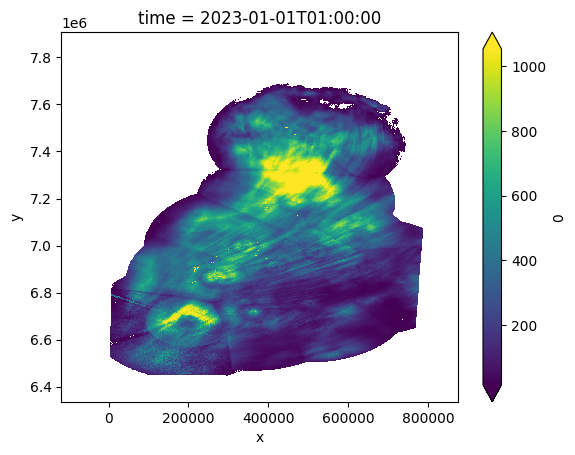

In [17]:
# dt['0'].ds['0'].isel(time=0).plot()
dt["0"].ds["0"].where(dt["0"].ds["0"] < 60000).isel(time=0).plot(robust=True)